In [1]:
#code from:https://github.com/abhinav-bhardwaj/IoT-Network-Intrusion-Detection-System-UNSW-NB15/blob/master/UNSW_Project.ipynb
#Fed 15th,2024,Thursday 6:17am
#Importing Modules and Libraries

# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report


from sklearn.ensemble import RandomForestClassifier

In [2]:
#عندما كان الارتباط اكبر من صفر (مع كل الميزات اي الكود الاصلي)

#نتائج خوارزميات التصنيف الثنائي

#LR
#Accuracy -  97.88728056667694


#KNN
#Accuracy -  98.03510933169079


#RF
#Accuracy -  98.82968894364028


#DT
#Accuracy -  98.33076686171852


# الخوارزمية ذات اعلى دقة
### RF

#
#نتائج التصنيف المتعدد

#LR
#Accuracy -  100.0

#KNN
#Accuracy -  87.01570680628272


#RF
#Accuracy -  100.0


#DT
#Accuracy -  100.0



# افضل خوارزمية من حيث اعلى دقة واقل وقت
##DT,RF,LR


#افضل خوارزمية ذات اعلى دقة في التصنيفين اللي بنخليها في الكود هذا
##RF
#COR>0.2

In [3]:
#Importing Datasets
#dataset from:https://github.com/abhinav-bhardwaj/IoT-Network-Intrusion-Detection-System-UNSW-NB15/blob/master/datasets/UNSW_NB15.csv
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('D:/UNSW-NB15 Dataset Files/UNSW_NB15.csv')

In [4]:
data.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [7]:
data['service'].replace('-',np.nan,inplace=True)

In [8]:
data.isnull().sum()

id                       0
dur                      0
proto                    0
service              94168
state                    0
spkts                    0
dpkts                    0
sbytes                   0
dbytes                   0
rate                     0
sttl                     0
dttl                     0
sload                    0
dload                    0
sloss                    0
dloss                    0
sinpkt                   0
dinpkt                   0
sjit                     0
djit                     0
swin                     0
stcpb                    0
dtcpb                    0
dwin                     0
tcprtt                   0
synack                   0
ackdat                   0
smean                    0
dmean                    0
trans_depth              0
response_body_len        0
ct_srv_src               0
ct_state_ttl             0
ct_dst_ltm               0
ct_src_dport_ltm         0
ct_dst_sport_ltm         0
ct_dst_src_ltm           0
i

In [9]:
data.shape

(175341, 45)

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(81173, 45)

In [12]:
data['attack_cat'].value_counts()

Generic           39496
Normal            19488
Exploits          16187
DoS                1791
Fuzzers            1731
Reconnaissance     1703
Analysis            564
Worms               114
Backdoor             99
Name: attack_cat, dtype: int64

In [13]:
data['state'].value_counts()

INT    39580
FIN    33640
CON     7711
REQ      228
RST       14
Name: state, dtype: int64

In [14]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [15]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
#file from:https://github.com/abhinav-bhardwaj/IoT-Network-Intrusion-Detection-System-UNSW-NB15/blob/master/datasets/UNSW_NB15_features.csv
features = pd.read_csv('D:/UNSW-NB15 Dataset Files/UNSW_NB15_features.csv')

In [16]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [17]:
features['Type '] = features['Type '].str.lower()

In [18]:
# selecting column names of all data types
#تحديد اسماء الاعمدة لجميع انواع البيانات
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [19]:
# selecting common column names from dataset and feature dataset
#تحديد اسماء الاعمدة الشائعة من مجموعة البيانات ومجموعة بيانات الميزات
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)
integer_names

Index(['sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'swin', 'stcpb',
       'dtcpb', 'dwin', 'trans_depth', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_srv_dst'],
      dtype='object')

In [20]:
# Converting integer columns to numeric
#تحويل الاعمدة الصحيحة الى رقمية
for c in integer_names:
  pd.to_numeric(data[c])

In [21]:
# Converting binary columns to numeric
#تحويل الأعمدة الثنائية الى رقمية
for c in binary_names:
  pd.to_numeric(data[c])

In [22]:
# Converting float columns to numeric
#الى رقمية floatتحويل الاعمدة 
for c in float_names:
  pd.to_numeric(data[c])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81

In [24]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


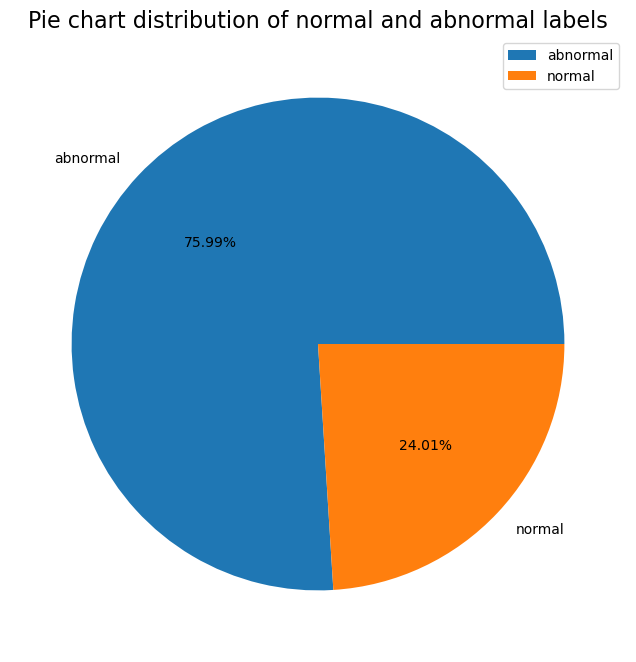

In [25]:
#Data Visualization
#Binary Classification
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['abnormal','normal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
#plt.savefig('plots/Pie_chart_binary.png')
plt.show()

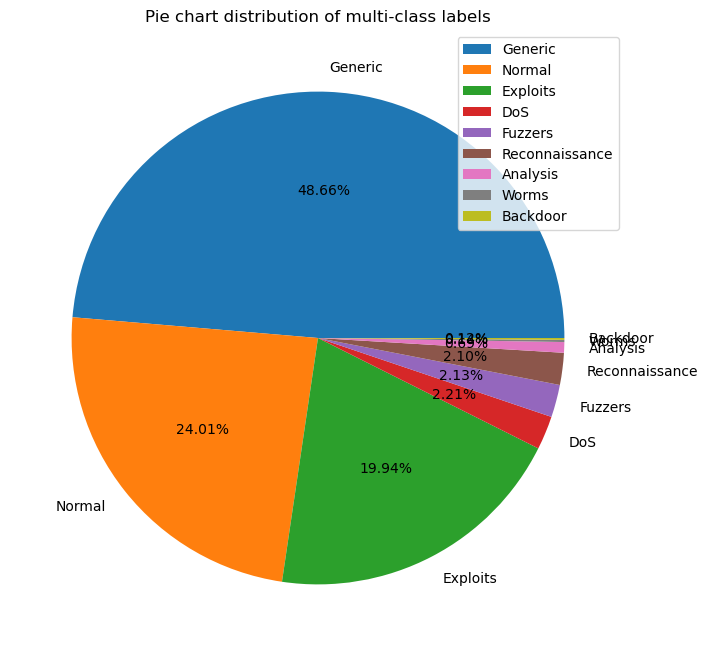

In [26]:
#Multi-class Classification
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=['Generic','Normal','Exploits','DoS','Fuzzers','Reconnaissance','Analysis','Worms','Backdoor'],autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
#plt.savefig('plots/Pie_chart_multi.png')
plt.show()

In [27]:
#One hot encoding
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
#اختيار سمات البيانات الفئوية
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [28]:
# creating a dataframe with only categorical attributes
#انشاء اطار بيانات بالسمات الفئوية فقط
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [29]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
#سمات فئوية ذات ترميز سريع باستخدام الوظيفة 
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [30]:
data.shape

(81173, 45)

In [31]:
data = pd.concat([data, data_cat],axis=1)

In [32]:
data.shape

(81173, 64)

In [33]:
data.drop(columns=cat_col,inplace=True)

In [34]:
data.shape

(81173, 61)

In [35]:
#Data Normalization
# selecting numeric attributes columns from data
#تحديد اعمدة السمات الرقمية من البيانات
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [36]:
# using minmax scaler for normalizing data
#استخدام تحجيم الحد الادنى الاقصى لتطبيع البيانات
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [37]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [39]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
#Label Encoding
#Binary Labels
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))
bin_label

,label
3,normal
11,normal
15,normal
17,normal
21,normal
...,...
175335,abnormal
175336,abnormal
175338,abnormal
175339,abnormal


In [41]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label
bin_data

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,8.333466e-08,0.000104,0.000000,0.000001,0.000000,0.166667,0.995536,0.000000,0.032986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175336,175337,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175338,175339,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175339,175340,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label
bin_data

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,8.333466e-08,0.000104,0.000000,0.000001,0.000000,0.166667,0.995536,0.000000,0.032986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175336,175337,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175338,175339,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175339,175340,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [44]:
#Multi-class Labels
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)
multi_label

,attack_cat
3,Normal
11,Normal
15,Normal
17,Normal
21,Normal
...,...
175335,Generic
175336,Generic
175338,Generic
175339,Generic


In [45]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [46]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [47]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [48]:
#Correlation between features of dataset
num_col.append('label')
num_col

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'proto_tcp',
 'proto_udp',
 'service_dhcp',
 'service_dns',
 'service_ftp',
 'service_ftp-data',
 'service_http',
 'service_irc',
 'service_pop3',
 'service_radius',
 'service_smtp',
 'service_snmp',
 'service_ssh',
 'service_ssl',
 'state_CON',
 'state_FIN',
 'state_INT',
 'state_REQ',
 'state_RST',
 'label']

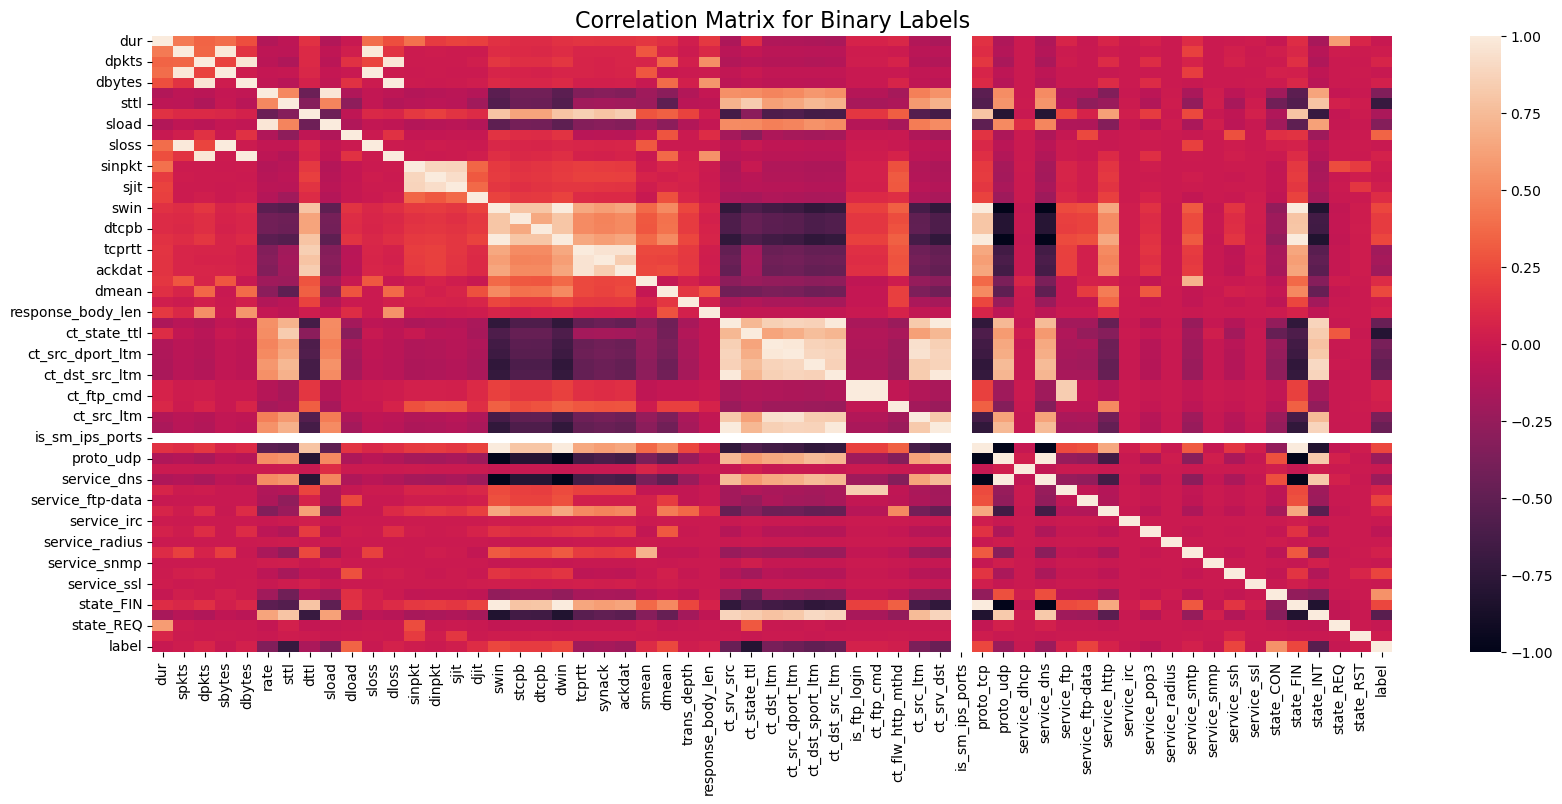

In [49]:
#Correlation Matrix for Binary Labels
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
#plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

In [50]:
#Correlation Matrix for Multi-class Labels
num_col = list(multi_data.select_dtypes(include='number').columns)

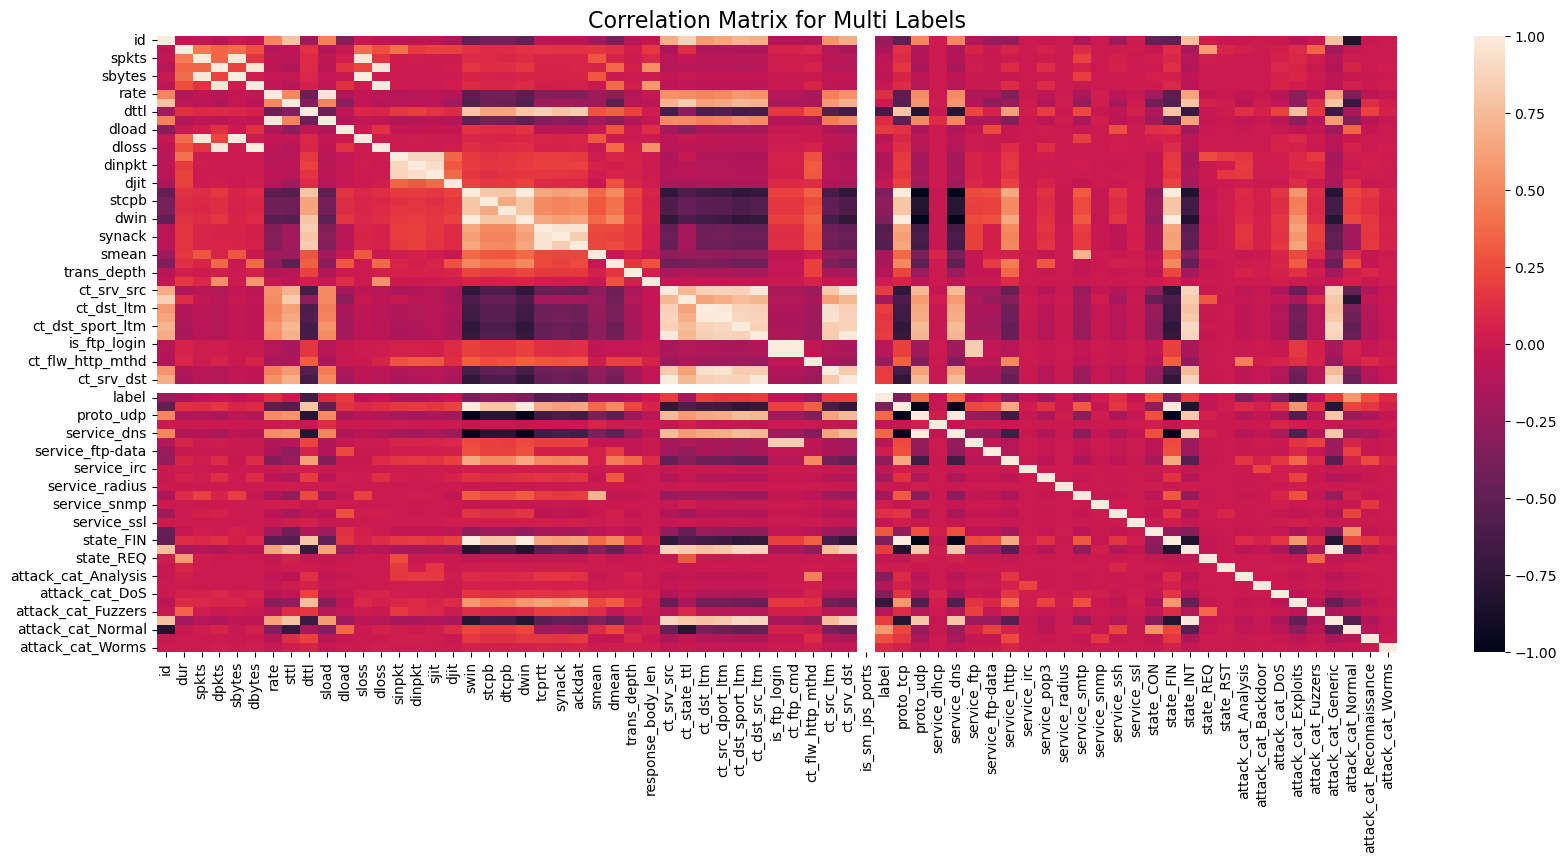

In [51]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
#plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

In [52]:
#Feature Selection
#Binary Labels
# finding the attributes which have more than 0.2 correlation with encoded attack label attribute
#العثور على السمات التي لها ارتباط اكثر من 0.2 بسمة تسمية الهجوم المشفرة
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.2]
highest_corr_bin.sort_values(ascending=True)

ackdat              0.203839
service_ftp-data    0.212381
service_ssh         0.224627
service_dns         0.225843
swin                0.227784
dwin                0.227784
proto_tcp           0.227784
proto_udp           0.227784
state_FIN           0.228613
dmean               0.240989
sload               0.334562
dload               0.343910
rate                0.344535
ct_src_ltm          0.368486
ct_dst_ltm          0.387358
ct_src_dport_ltm    0.444874
ct_srv_dst          0.459984
ct_srv_src          0.463153
ct_dst_src_ltm      0.463735
ct_dst_sport_ltm    0.497234
state_INT           0.546631
state_CON           0.552505
sttl                0.707337
ct_state_ttl        0.801403
label               1.000000
Name: label, dtype: float64

In [53]:
# selecting attributes found by using pearson correlation coefficient
#اختيار السمات التي تم العثور عليها باستخدام معامل ارتباط بيرسون
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'swin', 'dwin', 'ackdat', 'dmean',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst',
       'proto_tcp', 'proto_udp', 'service_dns', 'service_ftp-data',
       'service_ssh', 'state_CON', 'state_FIN', 'state_INT', 'label'],
      dtype='object')

In [54]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,swin,dwin,ackdat,dmean,ct_srv_src,ct_state_ttl,...,ct_srv_dst,proto_tcp,proto_udp,service_dns,service_ftp-data,service_ssh,state_CON,state_FIN,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,1.0,1.0,0.000000,0.043896,0.000000,0.166667,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,1.0,1.0,0.054975,0.054184,0.019608,0.166667,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,1.0,1.0,0.042914,0.093964,0.039216,0.166667,...,0.039216,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,1.0,1.0,0.069747,0.030864,0.098039,0.166667,...,0.039216,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.0,0.0,0.000000,0.000000,0.862745,0.333333,...,0.862745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.0,0.0,0.000000,0.000000,0.450980,0.333333,...,0.450980,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.0,0.0,0.000000,0.000000,0.215686,0.333333,...,0.215686,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.0,0.0,0.000000,0.000000,0.568627,0.333333,...,0.568627,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [55]:
#Multi-class Labels
# finding the attributes which have more than 0.2 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.2]
highest_corr_multi.sort_values(ascending=True)

ct_flw_http_mthd             0.233513
id                           0.235344
attack_cat_Reconnaissance    0.268604
service_http                 0.277331
stcpb                        0.286271
dtcpb                        0.291727
state_CON                    0.302853
attack_cat_Analysis          0.326209
attack_cat_DoS               0.339669
state_FIN                    0.361750
proto_udp                    0.364393
proto_tcp                    0.364393
swin                         0.364393
dwin                         0.364393
service_dns                  0.365346
synack                       0.524027
ackdat                       0.570098
tcprtt                       0.570205
attack_cat_Normal            0.570858
dttl                         0.646589
attack_cat_Exploits          0.719733
label                        1.000000
Name: label, dtype: float64

In [56]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['id', 'dttl', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack',
       'ackdat', 'ct_flw_http_mthd', 'label', 'proto_tcp', 'proto_udp',
       'service_dns', 'service_http', 'state_CON', 'state_FIN',
       'attack_cat_Analysis', 'attack_cat_DoS', 'attack_cat_Exploits',
       'attack_cat_Normal', 'attack_cat_Reconnaissance'],
      dtype='object')

In [57]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()
multi_data

,id,dttl,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,ct_flw_http_mthd,...,proto_udp,service_dns,service_http,state_CON,state_FIN,attack_cat_Analysis,attack_cat_DoS,attack_cat_Exploits,attack_cat_Normal,attack_cat_Reconnaissance
3,4,0.992126,1.0,0.257772,0.243888,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
11,12,0.992126,1.0,0.424852,0.200410,1.0,0.087972,0.103000,0.054975,0.000000,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
15,16,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0
17,18,0.992126,1.0,0.904076,0.718098,1.0,0.080709,0.115373,0.042914,0.033333,...,0.0,0.0,1.0,0.0,1.0,0,0,0,1,0
21,22,0.992126,1.0,0.620722,0.819917,1.0,0.103597,0.107399,0.069747,0.033333,...,0.0,0.0,1.0,0.0,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0
175336,175337,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0
175338,175339,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0
175339,175340,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0


In [58]:
#BINARY CLASSIFICATION
#Data Splitting
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [60]:
#Random Forest Classifier
rf_bin = RandomForestClassifier(random_state=123)
start_time=time.time()
rf_bin.fit(X_train,y_train)
training_time=time.time()-start_time

In [61]:
y_pred = rf_bin.predict(X_test)

In [62]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)
print('training_time-', training_time)

Mean Absolute Error -  0.012996612257468433
Mean Squared Error -  0.012996612257468433
Root Mean Squared Error -  0.11400268530814717
R2 Score -  92.89352815494574
Accuracy -  98.70033877425315
training_time- 6.843556642532349


In [63]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.98      0.97      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235



In [64]:
#Real and Predicted Data
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


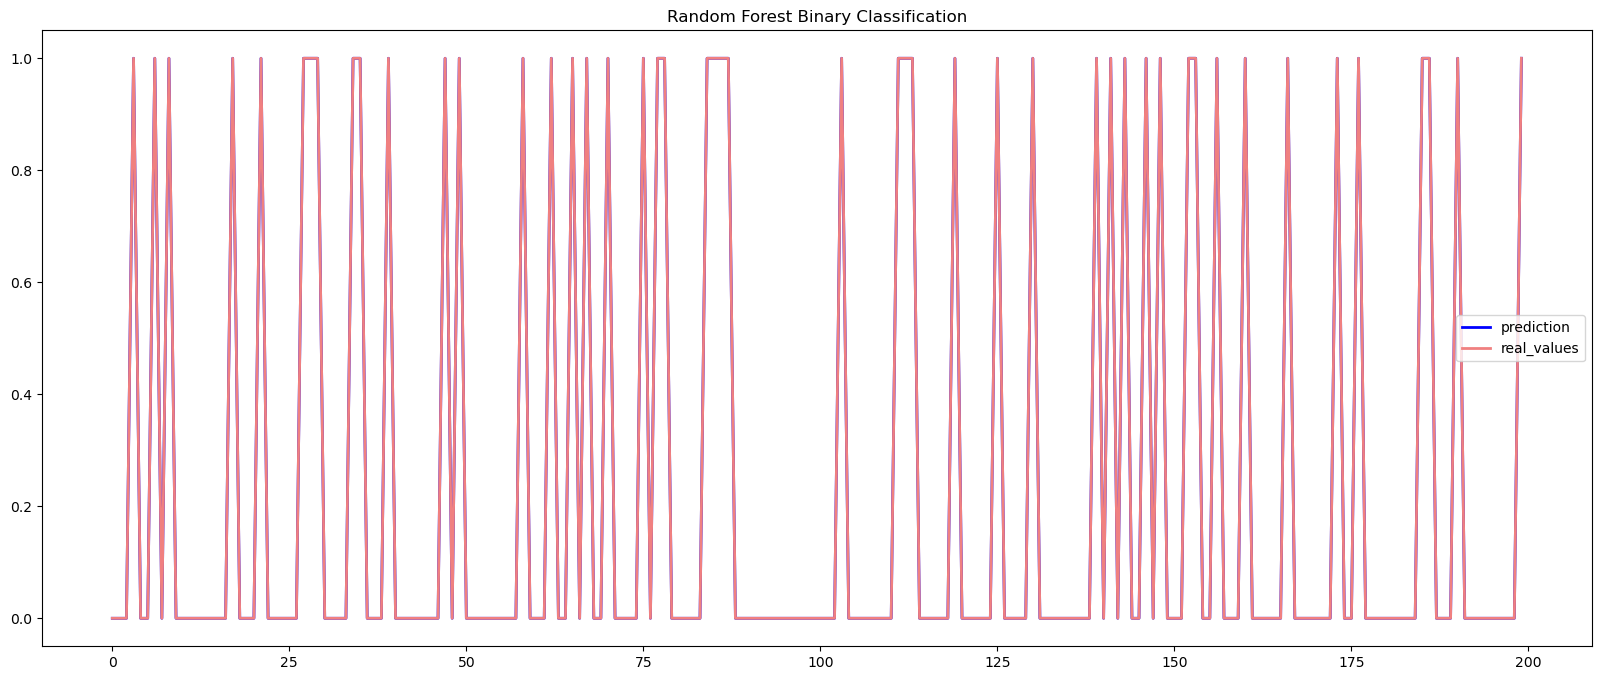

In [65]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.show()

In [66]:
#MULTI-CLASS CLASSIFICATION
#Data Splitting
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=100)

In [68]:
#Random Forest Classifier
rf_multi = RandomForestClassifier(random_state=50)
start_time=time.time()
rf_multi.fit(X_train,y_train)
training_time=time.time()-start_time

In [69]:
y_pred = rf_multi.predict(X_test)

In [70]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)
print('training_time-', training_time)

Mean Absolute Error -  0.011949491838620265
Mean Squared Error -  0.030428087465352634
Root Mean Squared Error -  0.17443648547638374
R2 Score -  97.92900011528316
Accuracy -  99.32861102556205
training_time- 16.477224111557007


In [71]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       1.00      1.00      1.00       109
      Backdoor       0.71      0.25      0.37        20
           DoS       1.00      1.00      1.00       346
      Exploits       1.00      1.00      1.00      3211
       Fuzzers       0.82      0.86      0.84       332
       Generic       0.99      1.00      1.00      7953
        Normal       1.00      1.00      1.00      3915
Reconnaissance       1.00      1.00      1.00       331
         Worms       0.50      0.11      0.18        18

      accuracy                           0.99     16235
     macro avg       0.89      0.80      0.82     16235
  weighted avg       0.99      0.99      0.99     16235



In [72]:
#Real and Predicted Data
rf_multi_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_multi_df

,Actual,Predicted
22650,6,6
27815,6,6
49033,3,3
156811,5,5
136878,5,5
...,...,...
38845,6,6
150431,5,5
17958,6,6
83653,3,3


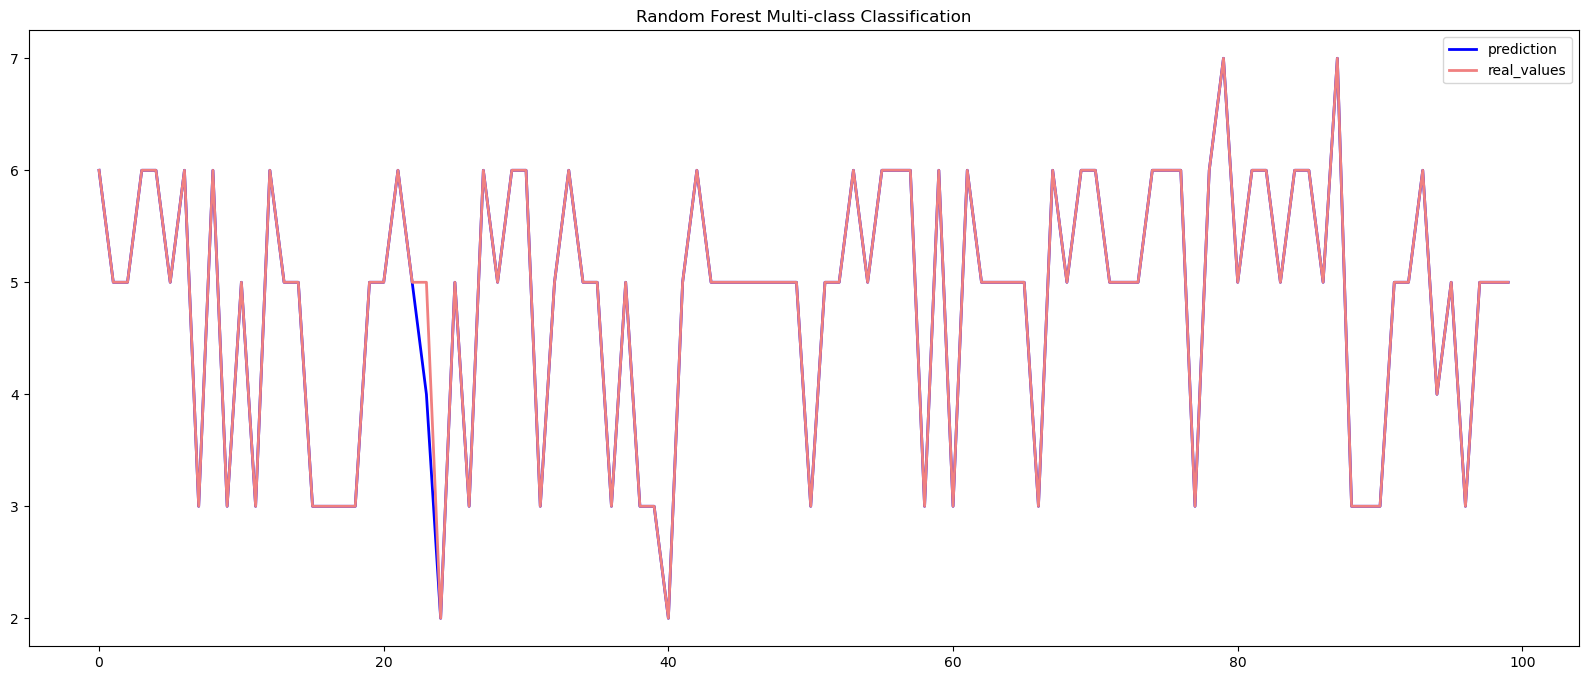

In [73]:
#Plot between Real and Predicted Data
plt.figure(figsize=(20,8))
plt.plot(y_pred[500:600], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[500:600].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.show()